**KNN MODEL TO DETERMINE THE INCOME LEVEL FOR US RESIDENTS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
font={'family':'serif','color':'black','size':15,'fontweight':'bold'}
df=pd.read_csv("/content/adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19235,26,Private,240842,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0.0,40.0,United-States,<=50K
19236,53,Private,103931,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0.0,40.0,United-States,<=50K
19237,60,Private,232618,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,35.0,United-States,>50K
19238,49,Local-gov,288548,Masters,14,Separated,Prof-specialty,Unmarried,White,Female,0,0.0,50.0,United-States,<=50K


In [2]:
# CHECK THE DATASET FOR INFORMATION ABOUT US
df['native-country'].value_counts()

United-States                 17318
Mexico                          362
?                               332
Philippines                     110
Germany                          81
Puerto-Rico                      80
Canada                           77
India                            59
El-Salvador                      56
China                            56
Cuba                             53
England                          47
Dominican-Republic               41
Italy                            41
South                            40
Japan                            37
Haiti                            36
Portugal                         35
Poland                           33
Jamaica                          31
Columbia                         28
Guatemala                        27
Greece                           24
Iran                             22
Vietnam                          21
Taiwan                           20
Nicaragua                        19
Ecuador                     

In [3]:
# FILTER DATA FOR NATIVE COUNTRY: UNITED STATES
df1=df.loc[df['native-country']=='United-States']
df1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,34,Private,225548,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0.0,30.0,United-States,<=50K
19235,26,Private,240842,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0.0,40.0,United-States,<=50K
19236,53,Private,103931,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0.0,40.0,United-States,<=50K
19237,60,Private,232618,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,35.0,United-States,>50K


In [4]:
df1.shape

(17318, 15)

In [5]:
df1.size

259770

In [6]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0.0,30.0,United-States,<=50K


In [7]:
df1.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19234,34,Private,225548,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0.0,30.0,United-States,<=50K
19235,26,Private,240842,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0.0,40.0,United-States,<=50K
19236,53,Private,103931,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0.0,40.0,United-States,<=50K
19237,60,Private,232618,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,35.0,United-States,>50K
19238,49,Local-gov,288548,Masters,14,Separated,Prof-specialty,Unmarried,White,Female,0,0.0,50.0,United-States,<=50K


In [8]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df1.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
educational-num      int64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [ ]:
df1.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Private             11826
Self-emp-not-inc     1403
Local-gov            1171
?                    1044
State-gov             739
Self-emp-inc          616
Federal-gov           508
Without-pay             8
Never-worked            3
Name: workclass, dtype: int64


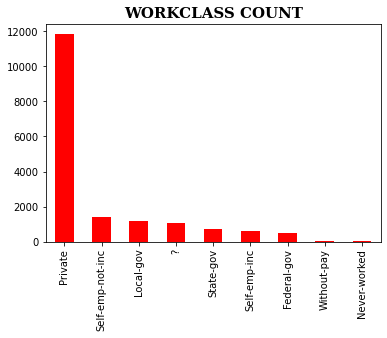

In [10]:
# COUNT AND VISUALIZE
# 1.COLUMN: workclass
work=df1['workclass'].value_counts()
print(work)
work.plot(kind='bar',color='red')
plt.title("WORKCLASS COUNT",fontdict=font)
plt.show()

HS-grad         5762
Some-college    3951
Bachelors       2856
Masters          970
Assoc-voc        748
11th             704
Assoc-acdm       573
10th             491
7th-8th          283
Prof-school      264
9th              225
12th             217
Doctorate        171
5th-6th           70
1st-4th           23
Preschool         10
Name: education, dtype: int64


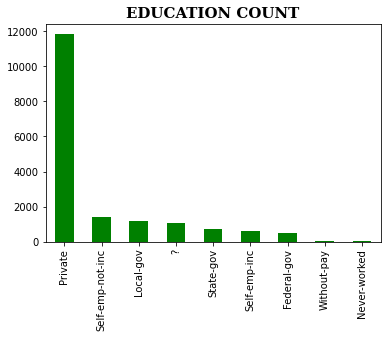

In [11]:
# 2.COLUMN: education
edu=df1['education'].value_counts()
print(edu)
work.plot(kind='bar',color='green')
plt.title("EDUCATION COUNT",fontdict=font)
plt.show()

Married-civ-spouse       7829
Never-married            5787
Divorced                 2419
Widowed                   570
Separated                 531
Married-spouse-absent     166
Married-AF-spouse          16
Name: marital-status, dtype: int64


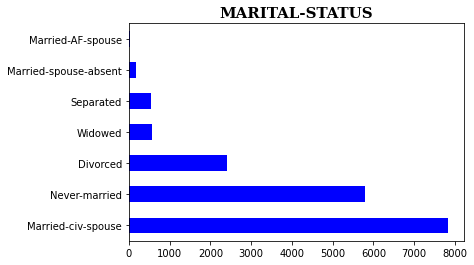

In [12]:
# 3.COLUMN: marital-status
mar=df1['marital-status'].value_counts()
print(mar)
mar.plot(kind='barh',color='blue')
plt.title("MARITAL-STATUS",fontdict=font)
plt.show()

Exec-managerial      2197
Craft-repair         2148
Prof-specialty       2129
Sales                2044
Adm-clerical         2000
Other-service        1661
?                    1047
Machine-op-inspct    1033
Transport-moving      829
Handlers-cleaners     718
Tech-support          566
Farming-fishing       496
Protective-serv       371
Priv-house-serv        72
Armed-Forces            7
Name: occupation, dtype: int64


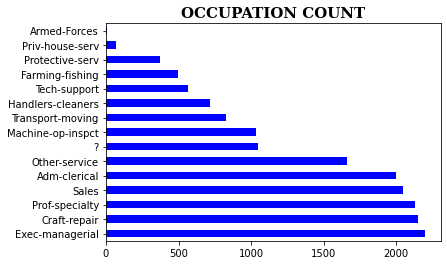

In [13]:
# 4.COLUMN: occupation
occ=df1['occupation'].value_counts()
print(occ)
occ.plot(kind='barh',color='blue')
plt.title("OCCUPATION COUNT",fontdict=font)
plt.show()

Husband           6920
Not-in-family     4619
Own-child         2747
Unmarried         1772
Wife               820
Other-relative     440
Name: relationship, dtype: int64


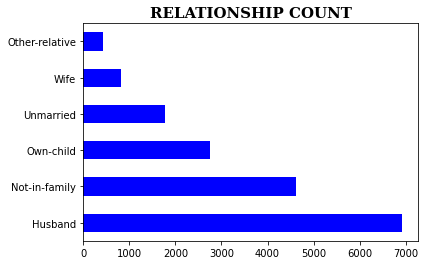

In [14]:
# 5.COLUMN: relationship
rel=df1['relationship'].value_counts()
print(rel)
rel.plot(kind='barh',color='blue')
plt.title("RELATIONSHIP COUNT",fontdict=font)
plt.show()

White                 15178
Black                  1725
Amer-Indian-Eskimo      182
Asian-Pac-Islander      164
Other                    69
Name: race, dtype: int64


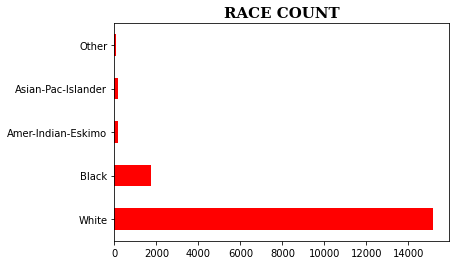

In [15]:
# 6.COLUMN: race
race=df1['race'].value_counts()
print(race)
race.plot(kind='barh',color='red')
plt.title("RACE COUNT",fontdict=font)
plt.show()

Male      11525
Female     5793
Name: gender, dtype: int64


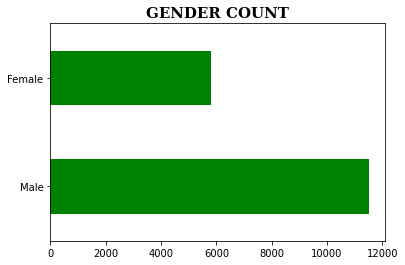

In [16]:
# 7.COLUMN: gender
gen=df1['gender'].value_counts()
print(gen)
gen.plot(kind='barh',color='green')
plt.title("GENDER COUNT",fontdict=font)
plt.show()

In [17]:
# GET DUMMY ENCODING
dummy=pd.get_dummies(df1[['workclass','education','marital-status','occupation',\
                         'relationship','race','gender']],drop_first=True)

In [18]:
# CONCATENATE
df2=pd.concat([df1,dummy],axis=1)
df2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,0,1,0,0,0,1,0,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,0,0,0,0,0,0,0,1,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,0,0,0,0,0,0,0,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,0,0,0,0,0,1,0,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,34,Private,225548,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,Black,Male,...,0,0,0,0,0,0,1,0,0,1
19235,26,Private,240842,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,...,0,0,0,1,0,0,1,0,0,0
19236,53,Private,103931,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,0,0,0,0,0,0,0,1,1
19237,60,Private,232618,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,0,1,1


In [19]:
# DROP UNWANTED COLUMNS
df3=df2.drop(['workclass','education','marital-status','occupation',\
                         'relationship','race','gender','native-country'],axis=1)

In [20]:
# SEPERATING INPUT X AND OUTPUT Y
x=df3.drop(['income'],axis=1).values
y=df3['income'].values

In [21]:
# SEPERATING TRAIN-TEST DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [22]:
# NORMALIZATION
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [23]:
# KNN ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [24]:
# PERFORMANCE EVALUATION
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
mat=confusion_matrix(y_pred,y_test)
mat

array([[3548,  559],
       [ 372,  717]])

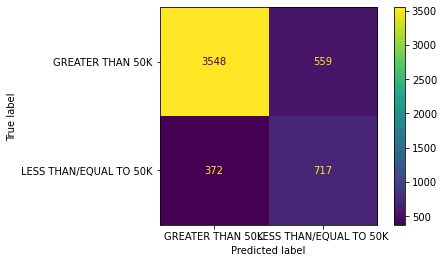

In [25]:
label=['GREATER THAN 50K','LESS THAN/EQUAL TO 50K']
cmd=ConfusionMatrixDisplay(mat,display_labels=label)
cmd.plot()

In [26]:
score=accuracy_score(y_pred,y_test)
score

0.8208237105465743

In [27]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      3920
        >50K       0.66      0.56      0.61      1276

    accuracy                           0.82      5196
   macro avg       0.76      0.73      0.75      5196
weighted avg       0.81      0.82      0.82      5196

